<a href="https://colab.research.google.com/github/FathimaNazarudeen/Advanced-Computing-Lab/blob/main/fork_of_mfcc_tcn_feature_extraction_classi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
!pip install keras-tcn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tcn import TCN
from keras.utils import to_categorical



In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tcn import TCN

# Load dataset
df = pd.read_csv('/kaggle/input/mfcc-tcn-feature-extraction-classi/high_level_featuresmfcc.csv')

# Split input features and class label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert string class labels to integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape input features to 3D array
X = X.reshape(-1, 1, X.shape[1])

# One-hot encode class labels
num_classes = 14
y = to_categorical(y, num_classes)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build TCN model
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=6, dilations=[1, 2, 4, 8, 16, 32, 64], 
              return_sequences=False, activation='relu', use_batch_norm=True))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history= model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

# Predict class labels for test set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate F1 score

f1 = metrics.f1_score(np.argmax(y_test, axis=1), y_pred_class, average='macro')

print("F1 score:", f1)

Epoch 1/50
153/153 [==============================] - 25s 43ms/step - loss: 2.3466 - accuracy: 0.4956 - val_loss: 2.1053 - val_accuracy: 0.3280
Epoch 2/50
153/153 [==============================] - 5s 36ms/step - loss: 0.6513 - accuracy: 0.8042 - val_loss: 0.7644 - val_accuracy: 0.7698
Epoch 3/50
153/153 [==============================] - 6s 37ms/step - loss: 0.3797 - accuracy: 0.8932 - val_loss: 0.1639 - val_accuracy: 0.9519
Epoch 4/50
153/153 [==============================] - 6s 36ms/step - loss: 0.2912 - accuracy: 0.9187 - val_loss: 0.1391 - val_accuracy: 0.9593
Epoch 5/50
153/153 [==============================] - 6s 36ms/step - loss: 0.2253 - accuracy: 0.9343 - val_loss: 0.0881 - val_accuracy: 0.9721
Epoch 6/50
153/153 [==============================] - 6s 36ms/step - loss: 0.1828 - accuracy: 0.9478 - val_loss: 0.0642 - val_accuracy: 0.9782
Epoch 7/50
153/153 [==============================] - 6s 36ms/step - loss: 0.1691 - accuracy: 0.9521 - val_loss: 0.0779 - val_accuracy: 0.976

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

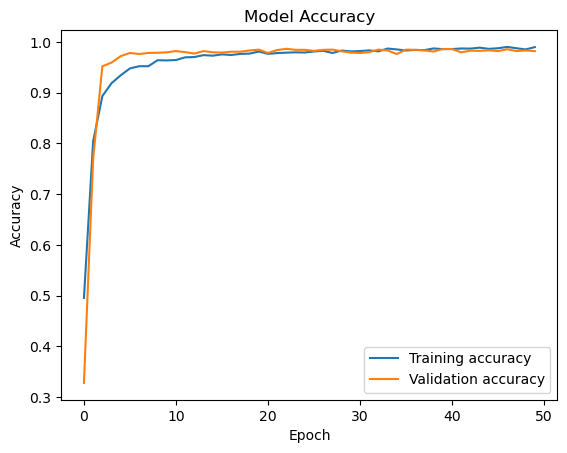

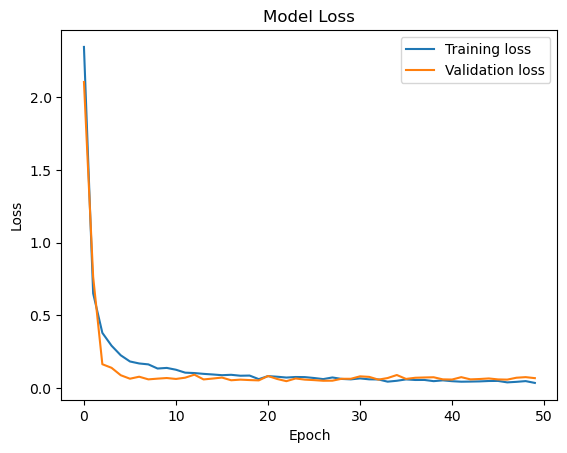

In [ ]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


77/77 [==============================] - 0s 4ms/step


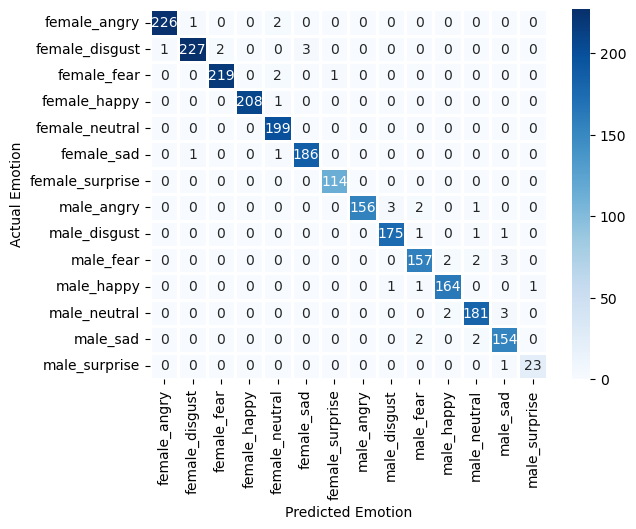

In [ ]:
# Get the true and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Set the tick labels to the emotion names
tick_labels = label_encoder.classes_

# Plot the confusion matrix
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='',
            xticklabels=tick_labels, yticklabels=tick_labels)

# Add labels to the plot
plt.xlabel('Predicted Emotion')
plt.ylabel('Actual Emotion')
plt.show()

In [ ]:
# Get the true and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get the classification report
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

77/77 [==============================] - 0s 4ms/step
                 precision    recall  f1-score   support

   female_angry       1.00      0.99      0.99       229
 female_disgust       0.99      0.97      0.98       233
    female_fear       0.99      0.99      0.99       222
   female_happy       1.00      1.00      1.00       209
 female_neutral       0.97      1.00      0.99       199
     female_sad       0.98      0.99      0.99       188
female_surprise       0.99      1.00      1.00       114
     male_angry       1.00      0.96      0.98       162
   male_disgust       0.98      0.98      0.98       178
      male_fear       0.96      0.96      0.96       164
     male_happy       0.98      0.98      0.98       167
   male_neutral       0.97      0.97      0.97       186
       male_sad       0.95      0.97      0.96       158
  male_surprise       0.96      0.96      0.96        24

       accuracy                           0.98      2433
      macro avg       0.98      0

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the true and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Set the emotion labels
emotions = label_encoder.classes_

# Print the confusion matrix
print("Confusion matrix:")
print("           Predicted Emotions")
print("           ", " ".join([f"{e:<8}" for e in emotions]))
for i, e in enumerate(emotions):
    print(f"Actual {e:<8}", " ".join([f"{cm[i][j]:<8}" for j in range(len(emotions))]))

77/77 [==============================] - 0s 4ms/step
Confusion matrix:
           Predicted Emotions
            female_angry female_disgust female_fear female_happy female_neutral female_sad female_surprise male_angry male_disgust male_fear male_happy male_neutral male_sad male_surprise
Actual female_angry 226      1        0        0        2        0        0        0        0        0        0        0        0        0       
Actual female_disgust 1        227      2        0        0        3        0        0        0        0        0        0        0        0       
Actual female_fear 0        0        219      0        2        0        1        0        0        0        0        0        0        0       
Actual female_happy 0        0        0        208      1        0        0        0        0        0        0        0        0        0       
Actual female_neutral 0        0        0        0        199      0        0        0        0        0        0        0    